
<div class="alert alert-info">

**This is a fixed-text formatted version of a Jupyter notebook**

- Try online [![Binder](https://static.mybinder.org/badge.svg)](https://mybinder.org/v2/gh/gammapy/gammapy-webpage/v0.17?urlpath=lab/tree/models.ipynb)
- You can contribute with your own notebooks in this
[GitHub repository](https://github.com/gammapy/gammapy/tree/master/tutorials).
- **Source files:**
[models.ipynb](../_static/notebooks/models.ipynb) |
[models.py](../_static/notebooks/models.py)
</div>


# Gammapy Models


This is an introduction and overview on how to work with models in Gammapy. 

The sub-package `~gammapy.modeling` contains all the functionality related to modeling and fitting
data. This includes spectral, spatial and temporal model classes, as well as the fit
and parameter API. We will cover the follwing topics in order:

1. [Spectral Models](#Spectral-Models)
1. [Spatial Models](#Spatial-Models)
1. [SkyModel and SkyDiffuseCube](#SkyModel-and-SkyDiffuseCube)
1. [Model Lists and Serialisation](#Model-Lists-and-Serialisation)
1. [Implementing as Custom Model](#Implementing-a-Custom-Model)

The models follow a naming scheme which contains the category as a suffix to the class name. An overview of all the available models can be found in the :ref:`model-gallery`.

Note that there is a separate tutorial [modeling](modeling.ipynb) that explains about `~gammapy.modeling`,
the Gammapy modeling and fitting framework. You have to read that to learn how to work with models in order to analyse data.



# Setup

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy import units as u
from gammapy.maps import Map

# Spectral Models

All models are imported from the `gammapy.modeling.models` namespace. Let's start with a `PowerLawSpectralModel`:

In [3]:
from gammapy.modeling.models import PowerLawSpectralModel

In [4]:
pwl = PowerLawSpectralModel()
print(pwl)

PowerLawSpectralModel

   name     value        unit      min max frozen   error  
--------- --------- -------------- --- --- ------ ---------
    index 2.000e+00                nan nan  False 0.000e+00
amplitude 1.000e-12 cm-2 s-1 TeV-1 nan nan  False 0.000e+00
reference 1.000e+00            TeV nan nan   True 0.000e+00


To get a list of all available spectral models you can import and print the spectral model registry or take a look at the [model gallery](https://docs.gammapy.org/stable/modeling/gallery/index.html#spectral-models):

In [5]:
from gammapy.modeling.models import SPECTRAL_MODELS

print(SPECTRAL_MODELS)

Registry
--------

  ConstantSpectralModel                  : ConstantSpectralModel
  CompoundSpectralModel                  : CompoundSpectralModel
  PowerLawSpectralModel                  : PowerLawSpectralModel
  PowerLaw2SpectralModel                 : PowerLaw2SpectralModel
  SmoothBrokenPowerLawSpectralModel      : SmoothBrokenPowerLawSpectralModel
  ExpCutoffPowerLawSpectralModel         : ExpCutoffPowerLawSpectralModel
  ExpCutoffPowerLaw3FGLSpectralModel     : ExpCutoffPowerLaw3FGLSpectralModel
  SuperExpCutoffPowerLaw3FGLSpectralModel: SuperExpCutoffPowerLaw3FGLSpectralModel
  SuperExpCutoffPowerLaw4FGLSpectralModel: SuperExpCutoffPowerLaw4FGLSpectralModel
  LogParabolaSpectralModel               : LogParabolaSpectralModel
  TemplateSpectralModel                  : TemplateSpectralModel
  GaussianSpectralModel                  : GaussianSpectralModel
  AbsorbedSpectralModel                  : AbsorbedSpectralModel
  NaimaSpectralModel                     : NaimaSpectralModel


Spectral models all come with default parameters. Different parameter
values can be passed on creation of the model, either as a string defining
the value and unit or as an `~astropy.units.Quantity` object directly:

In [6]:
amplitude = 1e-12 * u.Unit("TeV-1 cm-2 s-1")
pwl = PowerLawSpectralModel(amplitude=amplitude, index=2.2)

For convenience a `str` specifying the value and unit can be passed as well:

In [7]:
pwl = PowerLawSpectralModel(amplitude="2.7e-12 TeV-1 cm-2 s-1", index=2.2)
print(pwl)

PowerLawSpectralModel

   name     value        unit      min max frozen   error  
--------- --------- -------------- --- --- ------ ---------
    index 2.200e+00                nan nan  False 0.000e+00
amplitude 2.700e-12 cm-2 s-1 TeV-1 nan nan  False 0.000e+00
reference 1.000e+00            TeV nan nan   True 0.000e+00


The model can be evaluated at given energies by calling the model instance:

In [8]:
energy = [1, 3, 10, 30] * u.TeV
dnde = pwl(energy)
print(dnde)

[2.70000000e-12 2.40822469e-13 1.70358483e-14 1.51948705e-15] 1 / (cm2 s TeV)


The returned quantity is a differential photon flux. 

For spectral models you can computed in addition the integrated and energy flux
in a given energy range:

In [9]:
flux = pwl.integral(emin=1 * u.TeV, emax=10 * u.TeV)
print(flux)

eflux = pwl.energy_flux(emin=1 * u.TeV, emax=10 * u.TeV)
print(eflux)

2.108034597491956e-12 1 / (cm2 s)
4.982075849517389e-12 TeV / (cm2 s)


This also works for a list or an array of integration boundaries:

In [10]:
energy = [1, 3, 10, 30] * u.TeV
flux = pwl.integral(emin=energy[:-1], emax=energy[1:])
print(flux)

[1.64794383e-12 4.60090769e-13 1.03978226e-13] 1 / (cm2 s)


In some cases it can be useful to find use the inverse of a spectral model, to find the energy at which a given flux is reached:

In [11]:
dnde = 2.7e-12 * u.Unit("TeV-1 cm-2 s-1")
energy = pwl.inverse(dnde)
print(energy)

1.0 TeV


As a convenience you can also plot any spectral model in a given energy range:

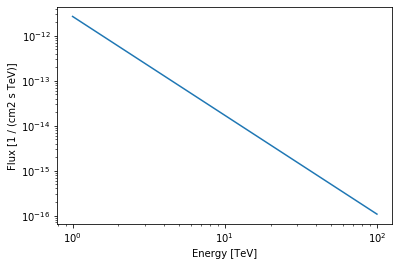

In [12]:
pwl.plot(energy_range=[1, 100] * u.TeV)

# Spatial Models

Spatial models are imported from the same `gammapy.modeling.models` namespace, let's start with a `GaussianSpatialModel`:

In [13]:
from gammapy.modeling.models import GaussianSpatialModel

In [14]:
gauss = GaussianSpatialModel(lon_0="0 deg", lat_0="0 deg", sigma="0.2 deg")
print(gauss)

GaussianSpatialModel

 name   value   unit    min        max    frozen   error  
----- --------- ---- ---------- --------- ------ ---------
lon_0 0.000e+00  deg        nan       nan  False 0.000e+00
lat_0 0.000e+00  deg -9.000e+01 9.000e+01  False 0.000e+00
sigma 2.000e-01  deg  0.000e+00       nan  False 0.000e+00
    e 0.000e+00       0.000e+00 1.000e+00   True 0.000e+00
  phi 0.000e+00  deg        nan       nan   True 0.000e+00


Again you can check the `SPATIAL_MODELS` registry to see which models are available or take a look at the [model gallery](https://docs.gammapy.org/stable/modeling/gallery/index.html#spatial-models).

In [15]:
from gammapy.modeling.models import SPATIAL_MODELS

print(SPATIAL_MODELS)

Registry
--------

  ConstantSpatialModel: ConstantSpatialModel
  TemplateSpatialModel: TemplateSpatialModel
  DiskSpatialModel    : DiskSpatialModel
  GaussianSpatialModel: GaussianSpatialModel
  PointSpatialModel   : PointSpatialModel
  ShellSpatialModel   : ShellSpatialModel



The default coordinate frame for all spatial models is ``"icrs"``, but the frame can be modified using the
``frame`` argument:

In [16]:
gauss = GaussianSpatialModel(
    lon_0="0 deg", lat_0="0 deg", sigma="0.2 deg", frame="galactic"
)

You can specify any valid `~astropy.coordinates` frame. The center position of the model can be retrieved as a `~astropy.coordinates.SkyCoord` object using `SpatialModel.position`: 

In [17]:
print(gauss.position)

<SkyCoord (Galactic): (l, b) in deg
    (0., 0.)>


Spatial models can be evaluated again by calling the instance:

In [18]:
lon = [0, 0.1] * u.deg
lat = [0, 0.1] * u.deg

flux_per_omega = gauss(lon, lat)
print(flux_per_omega)

[13061.88470839 10172.60603928] 1 / sr


The returned quantity corresponds to a surface brightness. Spatial model
can be also evaluated using `gammapy.maps.Map` and `gammapy.maps.Geom` objects:

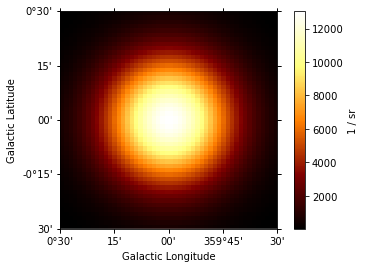

In [19]:
m = Map.create(skydir=(0, 0), width=(1, 1), binsz=0.02, frame="galactic")
m.quantity = gauss.evaluate_geom(m.geom)
m.plot(add_cbar=True);

Again for convenience the model can be plotted directly:

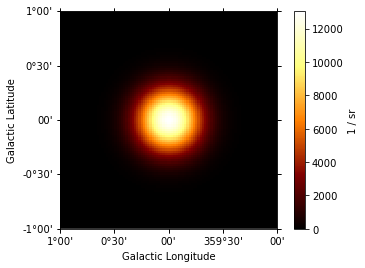

In [20]:
gauss.plot(add_cbar=True);

All spatial models have an associated sky region to it e.g. to illustrate the extend of the model on a sky image. The returned object is an `~regions.SkyRegion` object:

In [21]:
print(gauss.to_region())

Region: EllipseSkyRegion
center: <SkyCoord (Galactic): (l, b) in deg
    (0., 0.)>
width: 0.4 deg
height: 0.4 deg
angle: 0.0 deg


Now we can plot the region on an sky image:

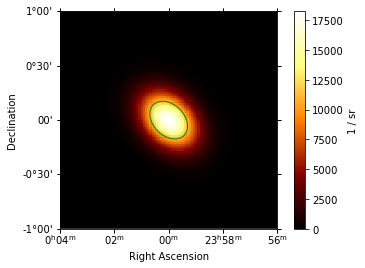

In [22]:
# create and plot the model
gauss_elongated = GaussianSpatialModel(
    lon_0="0 deg", lat_0="0 deg", sigma="0.2 deg", e=0.7, phi="45 deg"
)
ax = gauss_elongated.plot(add_cbar=True)

# add region illustration
region = gauss_elongated.to_region()
region_pix = region.to_pixel(ax.wcs)
ax.add_artist(region_pix.as_artist());

The `.to_region()` method can also be useful to write e.g. ds9 region files using `write_ds9` from the `regions` package:

In [23]:
from regions import write_ds9

regions = [gauss.to_region(), gauss_elongated.to_region()]

filename = "regions.reg"
write_ds9(regions, filename, coordsys="galactic", fmt=".4f", radunit="deg")

In [24]:
!cat regions.reg

# Region file format: DS9 astropy/regions
galactic
ellipse(0.0000,0.0000,0.2000,0.2000,0.0000)
ellipse(96.3373,-60.1886,0.1428,0.2000,45.0000)


# SkyModel and SkyDiffuseCube

The `~gammapy.modeling.models.SkyModel` class combines a spectral and a spatial model. It can be created
from existing spatial and spectral model components:

In [25]:
from gammapy.modeling.models import SkyModel

model = SkyModel(spectral_model=pwl, spatial_model=gauss, name="my-source")
print(model)

SkyModel

  Name                      : my-source
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : None
  Parameters:
    index                   :   2.200              
    amplitude               :   2.70e-12  1 / (cm2 s TeV)
    reference    (frozen)   :   1.000  TeV         
    lon_0                   :   0.000  deg         
    lat_0                   :   0.000  deg         
    sigma                   :   0.200  deg         
    e            (frozen)   :   0.000              
    phi          (frozen)   :   0.000  deg         




It is good practice to specify a name for your sky model, so that you can access it later by name and have meaningful identifier you serilisation. If you don't define a name, a unique random name is generated:

In [26]:
model_without_name = SkyModel(spectral_model=pwl, spatial_model=gauss)
print(model_without_name.name)

NmXTDyQY


The spectral and spatial component of the source model can be accessed using `.spectral_model` and `.spatial_model`:

In [27]:
model.spectral_model

In [28]:
model.spatial_model

And can be used as you have seen already seen above:

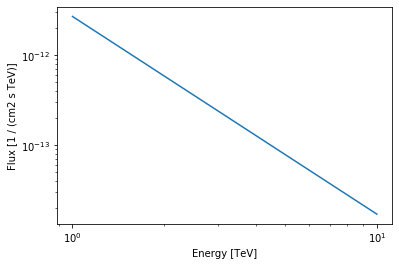

In [29]:
model.spectral_model.plot(energy_range=[1, 10] * u.TeV);

In some cases (e.g. when doing a spectral analysis) there is only a spectral model associated with the source. So the spatial model is optional:

In [30]:
model_spectrum = SkyModel(spectral_model=pwl, name="source-spectrum")
print(model_spectrum)

SkyModel

  Name                      : source-spectrum
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : None
  Temporal model type       : None
  Parameters:
    index                   :   2.200              
    amplitude               :   2.70e-12  1 / (cm2 s TeV)
    reference    (frozen)   :   1.000  TeV         




Additionally the `gammapy.modeling.models.SkyDiffuseCube` can be used to represent source models based on templates, where the spatial and energy axes are correlated. It can be created e.g. from an existing FITS file:



In [31]:
from gammapy.modeling.models import SkyDiffuseCube

In [32]:
diffuse = SkyDiffuseCube.read(
    "$GAMMAPY_DATA/fermi-3fhl-gc/gll_iem_v06_gc.fits.gz"
)
print(diffuse)

SkyDiffuseCube

  Name                      : gll_iem_v06_gc.fits
  Datasets names            : None
  Parameters:
    norm                    :   1.000              
    tilt         (frozen)   :   0.000              
    reference    (frozen)   :   1.000  TeV         




# Model Lists and Serialisation

In a typical analysis scenario a model consists of mutiple model components, or a "catalog" or "source library". To handle this list of multiple model components, Gammapy has a `Models` class:

In [33]:
from gammapy.modeling.models import Models

In [34]:
models = Models([model, diffuse])
print(models)

Models

Component 0: SkyModel

  Name                      : my-source
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : None
  Parameters:
    index                   :   2.200              
    amplitude               :   2.70e-12  1 / (cm2 s TeV)
    reference    (frozen)   :   1.000  TeV         
    lon_0                   :   0.000  deg         
    lat_0                   :   0.000  deg         
    sigma                   :   0.200  deg         
    e            (frozen)   :   0.000              
    phi          (frozen)   :   0.000  deg         

Component 1: SkyDiffuseCube

  Name                      : gll_iem_v06_gc.fits
  Datasets names            : None
  Parameters:
    norm                    :   1.000              
    tilt         (frozen)   :   0.000              
    reference    (frozen)   :   1.000  TeV         




Individual model components in the list can be accessed by their name:

In [35]:
print(models["my-source"])

SkyModel

  Name                      : my-source
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : None
  Parameters:
    index                   :   2.200              
    amplitude               :   2.70e-12  1 / (cm2 s TeV)
    reference    (frozen)   :   1.000  TeV         
    lon_0                   :   0.000  deg         
    lat_0                   :   0.000  deg         
    sigma                   :   0.200  deg         
    e            (frozen)   :   0.000              
    phi          (frozen)   :   0.000  deg         




**Note:**To make the access by name unambiguous, models are required to have a unique name, otherwise an error will be thrown.

To see which models are available you can use the `.names` attribute:

In [36]:
print(models.names)

['my-source', 'gll_iem_v06_gc.fits']


Note that a `SkyModel` object can be evaluated for a given longitude, latitude, and energy, but the `Models` object cannot. This `Models` container object will be assigned to `Dataset` or `Datasets` together with the data to be fitted as explained in other analysis tutorials (see for example the [modeling](modeling.ipynb) notebook).

The `Models` class also has in place `.append()` and `.extend()` methods:

In [37]:
model_copy = model.copy(name="my-source-copy")
models.append(model_copy)

This list of models can be also serialised toa custom YAML based format: 

In [38]:
models_yaml = models.to_yaml()
print(models_yaml)

components:
-   name: my-source
    type: SkyModel
    spectral:
        type: PowerLawSpectralModel
        parameters:
        - {name: index, value: 2.2, unit: '', min: .nan, max: .nan, frozen: false,
            error: 0}
        - {name: amplitude, value: 2.7e-12, unit: cm-2 s-1 TeV-1, min: .nan, max: .nan,
            frozen: false, error: 0}
        - {name: reference, value: 1.0, unit: TeV, min: .nan, max: .nan, frozen: true,
            error: 0}
    spatial:
        type: GaussianSpatialModel
        frame: galactic
        parameters:
        - {name: lon_0, value: 0.0, unit: deg, min: .nan, max: .nan, frozen: false,
            error: 0}
        - {name: lat_0, value: 0.0, unit: deg, min: -90.0, max: 90.0, frozen: false,
            error: 0}
        - {name: sigma, value: 0.2, unit: deg, min: 0.0, max: .nan, frozen: false,
            error: 0}
        - {name: e, value: 0.0, unit: '', min: 0.0, max: 1.0, frozen: true, error: 0}
        - {name: phi, value: 0.0, unit: deg,

The structure of the yaml files follows the structure of the python objects.
The `components` listed correspond to the `SkyModel` and `SkyDiffuseCube` components of the `Models`. 
For each `SkyModel` we have  informations about its `name`, `type` (corresponding to the tag attribute) and sub-mobels (i.e `spectral` model and eventually `spatial` model). Then the spatial and spectral models are defiend by their type and parameters. The `parameters` keys name/value/unit are mandatory, while the keys min/max/frozen are optionnals (so you can prepare shorter files).

If you want to write this list of models to disk and read it back later you can use:

In [39]:
models.write("models.yaml", overwrite=True)

In [40]:
models_read = Models.read("models.yaml")

Additionally the models can exported and imported togeter with the data using the `Datasets.read()` and `Datasets.write()` methods as shown in the [analysis_mwl](analysis_mwl.ipynb) notebook.

# Implementing a Custom Model

In order to add a user defined spectral model you have to create a SpectralModel subclass.
This new model class should include:

- a tag used for serialization (it can be the same as the class name)
- an instantiation of each Parameter with their unit, default values and frozen status
- the evaluate function where the mathematical expression for the model is defined.

As an example we will use a PowerLawSpectralModel plus a Gaussian (with fixed width).
First we define the new custom model class that we name `MyCustomSpectralModel`:

In [41]:
from gammapy.modeling.models import SpectralModel, Parameter


class MyCustomSpectralModel(SpectralModel):
    """My custom spectral model, parametrising a power law plus a Gaussian spectral line.
    
    Parameters
    ----------
    amplitude : `~astropy.units.Quantity`
        Amplitude of the spectra model.
    index : `~astropy.units.Quantity`
        Spectral index of the model.
    reference : `~astropy.units.Quantity`
        Reference energy of the power law.
    mean : `~astropy.units.Quantity`
        Mean value of the Gaussian.
    width : `~astropy.units.Quantity`
        Sigma width of the Gaussian line.
    
    """

    tag = "MyCustomSpectralModel"
    amplitude = Parameter("amplitude", "1e-12 cm-2 s-1 TeV-1", min=0)
    index = Parameter("index", 2, min=0)
    reference = Parameter("reference", "1 TeV", frozen=True)
    mean = Parameter("mean", "1 TeV", min=0)
    width = Parameter("width", "0.1 TeV", min=0, frozen=True)

    @staticmethod
    def evaluate(energy, index, amplitude, reference, mean, width):
        pwl = PowerLawSpectralModel.evaluate(
            energy=energy,
            index=index,
            amplitude=amplitude,
            reference=reference,
        )
        gauss = amplitude * np.exp(-((energy - mean) ** 2) / (2 * width ** 2))
        return pwl + gauss

It is good practice to also implement a docstring for the model, defining the parameters and also definig a `tag`, which specifies the name of the model for serialisation. Also note that gammapy assumes that all SpectralModel evaluate functions return a flux in unit of `"cm-2 s-1 TeV-1"` (or equivalent dimensions).



This model can now be used as any other spectral model in Gammapy:

In [42]:
my_custom_model = MyCustomSpectralModel(mean="3 TeV")
print(my_custom_model)

MyCustomSpectralModel

   name     value        unit         min    max frozen   error  
--------- --------- -------------- --------- --- ------ ---------
amplitude 1.000e-12 cm-2 s-1 TeV-1 0.000e+00 nan  False 0.000e+00
    index 2.000e+00                0.000e+00 nan  False 0.000e+00
reference 1.000e+00            TeV       nan nan   True 0.000e+00
     mean 3.000e+00            TeV 0.000e+00 nan  False 0.000e+00
    width 1.000e-01            TeV 0.000e+00 nan   True 0.000e+00


In [43]:
my_custom_model.integral(1 * u.TeV, 10 * u.TeV)

<Quantity 1.14439576e-12 1 / (cm2 s)>

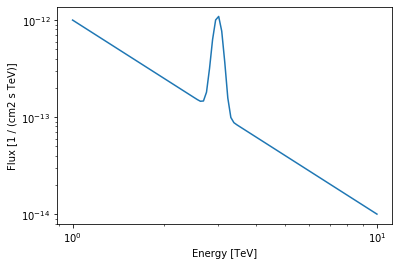

In [44]:
my_custom_model.plot(energy_range=[1, 10] * u.TeV)

As a next step we can also register the custom model in the `SPECTRAL_MODELS` registry, so that it becomes available for serilisation:

In [45]:
SPECTRAL_MODELS.append(MyCustomSpectralModel)

In [46]:
model = SkyModel(spectral_model=my_custom_model, name="my-source")
models = Models([model])
models.write("my-custom-models.yaml", overwrite=True)

In [47]:
!cat my-custom-models.yaml

components:
-   name: my-source
    type: SkyModel
    spectral:
        type: MyCustomSpectralModel
        parameters:
        - {name: amplitude, value: 1.0e-12, unit: cm-2 s-1 TeV-1, min: 0.0, max: .nan,
            frozen: false, error: 0}
        - {name: index, value: 2.0, unit: '', min: 0.0, max: .nan, frozen: false,
            error: 0}
        - {name: reference, value: 1.0, unit: TeV, min: .nan, max: .nan, frozen: true,
            error: 0}
        - {name: mean, value: 3.0, unit: TeV, min: 0.0, max: .nan, frozen: false,
            error: 0}
        - {name: width, value: 0.1, unit: TeV, min: 0.0, max: .nan, frozen: true,
            error: 0}
covariance: my-custom-models_covariance.dat


Similarly you can also create custom spatial models and add them to the `SPATIAL_MODELS` registry. In that case gammapy assumes that the evaluate function return a normalized quantity in "sr-1" such as the model integral over the whole sky is one.